In [ ]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.3.0


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

### Get the data


In [ ]:
dataset_path = tf.keras.utils.get_file("cars-train-data.csv", "https://storage.googleapis.com/hello-coffee-232418-vcm/datasets/cars-train-data.csv")
dataset_path

'/root/.keras/datasets/cars-train-data.csv'

Import it using pandas

In [ ]:
column_names = ['Ind', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
                'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t', skiprows=1,
                      sep=",", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.head()

Ind                              Name    Location  ...  Seats  New_Price  Price
0    0            Maruti Wagon R LXI CNG      Mumbai  ...    5.0        NaN   1.75
1    1  Hyundai Creta 1.6 CRDi SX Option        Pune  ...    5.0        NaN  12.50
2    2                      Honda Jazz V     Chennai  ...    5.0  8.61 Lakh   4.50
3    3                 Maruti Ertiga VDI     Chennai  ...    7.0        NaN   6.00
4    4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  ...    5.0        NaN  17.74

[5 rows x 14 columns]

In [ ]:
dataset = dataset.drop(columns=['Ind', 'Name', 'Location', 'Seats', 'New_Price'])
dataset.head()

Year  Kilometers_Driven Fuel_Type  ...   Engine      Power  Price
0  2010              72000       CNG  ...   998 CC  58.16 bhp   1.75
1  2015              41000    Diesel  ...  1582 CC  126.2 bhp  12.50
2  2011              46000    Petrol  ...  1199 CC   88.7 bhp   4.50
3  2012              87000    Diesel  ...  1248 CC  88.76 bhp   6.00
4  2013              40670    Diesel  ...  1968 CC  140.8 bhp  17.74

[5 rows x 9 columns]

In [ ]:
dataset.describe()

Year  Kilometers_Driven        Price
count  6019.000000       6.019000e+03  6019.000000
mean   2013.358199       5.873838e+04     9.479468
std       3.269742       9.126884e+04    11.187917
min    1998.000000       1.710000e+02     0.440000
25%    2011.000000       3.400000e+04     3.500000
50%    2014.000000       5.300000e+04     5.640000
75%    2016.000000       7.300000e+04     9.950000
max    2019.000000       6.500000e+06   160.000000

### Clean the data

The dataset contains a few unknown values.

In [ ]:
dataset.isna().sum()

Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Price                 0
dtype: int64

I drop those rows.

In [ ]:
dataset = dataset.dropna()

dataset = dataset.reset_index(drop=True)
dataset.head()

Year  Kilometers_Driven Fuel_Type  ...   Engine      Power  Price
0  2010              72000       CNG  ...   998 CC  58.16 bhp   1.75
1  2015              41000    Diesel  ...  1582 CC  126.2 bhp  12.50
2  2011              46000    Petrol  ...  1199 CC   88.7 bhp   4.50
3  2012              87000    Diesel  ...  1248 CC  88.76 bhp   6.00
4  2013              40670    Diesel  ...  1968 CC  140.8 bhp  17.74

[5 rows x 9 columns]

In [ ]:
import re

dataset['Mileage'] = pd.Series([re.sub('[^.0-9]', '', str(val)) for val in dataset['Mileage']], index = dataset.index)
dataset['Engine'] = pd.Series([re.sub('[^.0-9]', '', str(val)) for val in dataset['Engine']], index = dataset.index)
dataset['Power'] = pd.Series([re.sub('[^.0-9]', '', str(val)) for val in dataset['Power']], index = dataset.index)
dataset['Price'] = pd.Series([int(float(val)*1317.64) for val in dataset['Price']], index = dataset.index)

dataset.head()

Year  Kilometers_Driven Fuel_Type Transmission  ... Mileage Engine  Power  Price
0  2010              72000       CNG       Manual  ...    26.6    998  58.16   2305
1  2015              41000    Diesel       Manual  ...   19.67   1582  126.2  16470
2  2011              46000    Petrol       Manual  ...    18.2   1199   88.7   5929
3  2012              87000    Diesel       Manual  ...   20.77   1248  88.76   7905
4  2013              40670    Diesel    Automatic  ...    15.2   1968  140.8  23374

[5 rows x 9 columns]

In [ ]:
dataset = dataset.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
dataset.isna().sum()

Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                107
Price                  0
dtype: int64

In [ ]:
dataset = dataset.dropna()

dataset = dataset.reset_index(drop=True)
dataset.head()

Year  Kilometers_Driven Fuel_Type Transmission  ... Mileage Engine  Power  Price
0  2010              72000       CNG       Manual  ...    26.6    998  58.16   2305
1  2015              41000    Diesel       Manual  ...   19.67   1582  126.2  16470
2  2011              46000    Petrol       Manual  ...    18.2   1199   88.7   5929
3  2012              87000    Diesel       Manual  ...   20.77   1248  88.76   7905
4  2013              40670    Diesel    Automatic  ...    15.2   1968  140.8  23374

[5 rows x 9 columns]

In [ ]:

dataset['Mileage'] = pd.Series([float(str(val)) for val in dataset['Mileage']], index = dataset.index)
dataset['Engine'] = pd.Series([float(str(val)) for val in dataset['Engine']], index = dataset.index)
dataset['Power'] = pd.Series([float(val) for val in dataset['Power']], index = dataset.index)

# counter = 0
# for i in dataset['Power']:
#   print(float(str(dataset['Power'][counter])))
#   print(counter)
#   counter += 1

In [ ]:
dataset['Power'][76]

132.0

In [ ]:
dataset = dataset[['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Owner_Type', 'Transmission', 'Fuel_Type']]
dataset.head()

Price  Year  Kilometers_Driven  ...  Owner_Type  Transmission  Fuel_Type
0   2305  2010              72000  ...       First        Manual        CNG
1  16470  2015              41000  ...       First        Manual     Diesel
2   5929  2011              46000  ...       First        Manual     Petrol
3   7905  2012              87000  ...       First        Manual     Diesel
4  23374  2013              40670  ...      Second     Automatic     Diesel

[5 rows x 9 columns]

## One-hot Encoding for categorical data

In [ ]:
print(dataset['Fuel_Type'].unique())
dataset['Fuel_Type'] = pd.Categorical(dataset['Fuel_Type'])
dfFuel_Type = pd.get_dummies(dataset['Fuel_Type'], prefix = 'Fuel_Type')

dfFuel_Type.head()

['CNG' 'Diesel' 'Petrol' 'LPG']


Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol
0              1                 0              0                 0
1              0                 1              0                 0
2              0                 0              0                 1
3              0                 1              0                 0
4              0                 1              0                 0

In [ ]:
print(dataset['Transmission'].unique())
dataset['Transmission'] = pd.Categorical(dataset['Transmission'])
dfTransmission = pd.get_dummies(dataset['Transmission'], prefix = 'Transmission')

dfTransmission.head()

['Manual' 'Automatic']


Transmission_Automatic  Transmission_Manual
0                       0                    1
1                       0                    1
2                       0                    1
3                       0                    1
4                       1                    0

In [ ]:
print(dataset['Owner_Type'].unique())
dataset['Owner_Type'] = pd.Categorical(dataset['Owner_Type'])
dfOwner_Type = pd.get_dummies(dataset['Owner_Type'], prefix = 'Owner_Type')

dfOwner_Type.head()

['First' 'Second' 'Fourth & Above' 'Third']


Owner_Type_First  ...  Owner_Type_Third
0                 1  ...                 0
1                 1  ...                 0
2                 1  ...                 0
3                 1  ...                 0
4                 0  ...                 0

[5 rows x 4 columns]

In [ ]:
dataset = pd.concat([dataset, dfFuel_Type, dfTransmission, dfOwner_Type], axis=1)
dataset.head()

Price  Year  ...  Owner_Type_Second  Owner_Type_Third
0   2305  2010  ...                  0                 0
1  16470  2015  ...                  0                 0
2   5929  2011  ...                  0                 0
3   7905  2012  ...                  0                 0
4  23374  2013  ...                  1                 0

[5 rows x 19 columns]

In [ ]:
dataset = dataset.drop(columns=['Owner_Type', 'Transmission', 'Fuel_Type'])
dataset.head()

Price  Year  ...  Owner_Type_Second  Owner_Type_Third
0   2305  2010  ...                  0                 0
1  16470  2015  ...                  0                 0
2   5929  2011  ...                  0                 0
3   7905  2012  ...                  0                 0
4  23374  2013  ...                  1                 0

[5 rows x 16 columns]

###Splitting

I split the dataset into a training set and a test set.

And use the test set in the final evaluation of the model.

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### Inspecting the data

Using sns, I try to have a quick look at the joint distribution of a few pairs of columns from the training set.

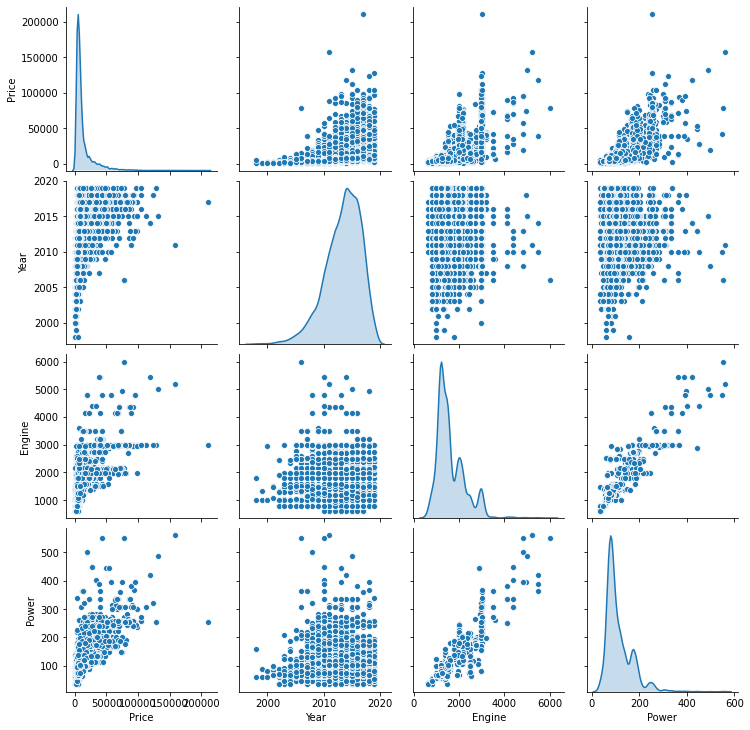

In [ ]:
sns.pairplot(train_dataset[["Price", "Year", "Engine", "Power"]], diag_kind="kde")

### Split features from labels

I now separate the target value, or "label", from the features.

In [ ]:
train_labels = train_dataset.pop('Price')
test_labels = test_dataset.pop('Price')

In [ ]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

count          mean  ...       75%         max
Year                       4699.0   2013.479038  ...   2016.00     2019.00
Kilometers_Driven          4699.0  58647.442647  ...  72203.00  6500000.00
Mileage                    4699.0     18.278423  ...     21.10       33.54
Engine                     4699.0   1629.603958  ...   1991.00     5998.00
Power                      4699.0    113.658206  ...    139.04      560.00
Fuel_Type_CNG              4699.0      0.009151  ...      0.00        1.00
Fuel_Type_Diesel           4699.0      0.536284  ...      1.00        1.00
Fuel_Type_LPG              4699.0      0.001915  ...      0.00        1.00
Fuel_Type_Petrol           4699.0      0.452649  ...      1.00        1.00
Transmission_Automatic     4699.0      0.289636  ...      1.00        1.00
Transmission_Manual        4699.0      0.710364  ...      1.00        1.00
Owner_Type_First           4699.0      0.825495  ...      1.00        1.00
Owner_Type_Fourth & Above  4699.0      0.001490  ...      0.00        1.00
Owner_Type_Second          4699.0      0.155352  ...      0.00        1.00
Owner_Type_Third           4699.0      0.017663  ...      0.00        1.00

[15 rows x 8 columns]

**Also** at the overall statistics:

In [ ]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

count          mean  ...       75%         max
Year                       4699.0   2013.479038  ...   2016.00     2019.00
Kilometers_Driven          4699.0  58647.442647  ...  72203.00  6500000.00
Mileage                    4699.0     18.278423  ...     21.10       33.54
Engine                     4699.0   1629.603958  ...   1991.00     5998.00
Power                      4699.0    113.658206  ...    139.04      560.00
Fuel_Type_CNG              4699.0      0.009151  ...      0.00        1.00
Fuel_Type_Diesel           4699.0      0.536284  ...      1.00        1.00
Fuel_Type_LPG              4699.0      0.001915  ...      0.00        1.00
Fuel_Type_Petrol           4699.0      0.452649  ...      1.00        1.00
Transmission_Automatic     4699.0      0.289636  ...      1.00        1.00
Transmission_Manual        4699.0      0.710364  ...      1.00        1.00
Owner_Type_First           4699.0      0.825495  ...      1.00        1.00
Owner_Type_Fourth & Above  4699.0      0.001490  ...      0.00        1.00
Owner_Type_Second          4699.0      0.155352  ...      0.00        1.00
Owner_Type_Third           4699.0      0.017663  ...      0.00        1.00

[15 rows x 8 columns]

In [ ]:
train_dataset.head()

Year  Kilometers_Driven  ...  Owner_Type_Second  Owner_Type_Third
5587  2014              64042  ...                  0                 0
4801  2014              66000  ...                  0                 0
3060  2016              36000  ...                  0                 0
4228  2016              23988  ...                  0                 0
5795  2016              33554  ...                  0                 0

[5 rows x 15 columns]

**bold text**### Normalize the data



In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
normed_train_data.head()

Year  Kilometers_Driven  ...  Owner_Type_Second  Owner_Type_Third
5587  0.165104           0.053034  ...           -0.42882         -0.134079
4801  0.165104           0.072283  ...           -0.42882         -0.134079
3060  0.798946          -0.222648  ...           -0.42882         -0.134079
4228  0.798946          -0.340738  ...           -0.42882         -0.134079
5795  0.798946          -0.246694  ...           -0.42882         -0.134079

[5 rows x 15 columns]

This normalized data is what we will use to train the model.




### Build the model

Here, I use a `Sequential` model with eight multiple connected hidden layers, and an output layer that returns a single, continuous value.

In [ ]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               4096      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8

In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.02346026],
       [-0.03835166],
       [-0.04254106],
       [ 0.00275124],
       [ 0.00302435],
       [-0.00448016],
       [-0.04260533],
       [-0.03499787],
       [-0.00106693],
       [-0.04711077]], dtype=float32)

Train the model

I now train the model for 1000 epochs, and record the training and validation accuracy in the `history` object.

In [ ]:
EPOCHS = 2000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:101870232.0000,  mae:5379.0708,  mse:101870232.0000,  val_loss:39276992.0000,  val_mae:3614.6541,  val_mse:39276992.0000,  
....................................................................................................
Epoch: 100, loss:27198078.0000,  mae:2425.3081,  mse:27198078.0000,  val_loss:20647646.0000,  val_mae:2369.3193,  val_mse:20647646.0000,  
....................................................................................................
Epoch: 200, loss:17907328.0000,  mae:1833.3929,  mse:17907328.0000,  val_loss:53863640.0000,  val_mae:3414.3059,  val_mse:53863640.0000,  
....................................................................................................
Epoch: 300, loss:13105858.0000,  mae:1546.1636,  mse:13105858.0000,  val_loss:20190276.0000,  val_mae:2362.0530,  val_mse:20190276.0000,  
....................................................................................................
Epoch: 400, loss:8603161.0000,  mae:129


**Visualize** the model's training progress using the stats stored in the `history` object.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss         mae           mse  ...      val_mae     val_mse  epoch
1995  1.106997e+06  516.204529  1.106997e+06  ...  2386.916016  18748358.0   1995
1996  1.258334e+06  504.094543  1.258334e+06  ...  2359.401367  19143708.0   1996
1997  1.032374e+06  502.322845  1.032374e+06  ...  2395.557373  19423294.0   1997
1998  1.113832e+06  510.792999  1.113832e+06  ...  2366.486328  18435886.0   1998
1999  1.002355e+06  512.186829  1.002355e+06  ...  2395.656982  20188886.0   1999

[5 rows x 7 columns]

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Price]')

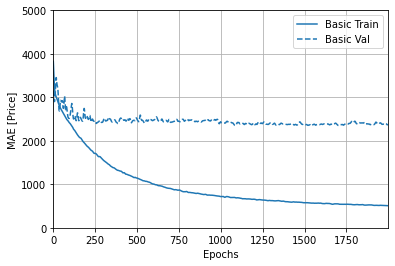

In [ ]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 5000])
plt.ylabel('MAE [Price]')

Text(0, 0.5, 'MSE [Price^2]')

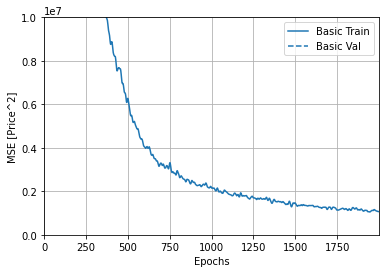

In [ ]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 10000000])
plt.ylabel('MSE [Price^2]')

In [ ]:
example_batch = normed_train_data[:5]
example_batch

Year  Kilometers_Driven  ...  Owner_Type_Second  Owner_Type_Third
5587  0.165104           0.053034  ...           -0.42882         -0.134079
4801  0.165104           0.072283  ...           -0.42882         -0.134079
3060  0.798946          -0.222648  ...           -0.42882         -0.134079
4228  0.798946          -0.340738  ...           -0.42882         -0.134079
5795  0.798946          -0.246694  ...           -0.42882         -0.134079

[5 rows x 15 columns]

In [ ]:
example_batch = normed_test_data[5:6]
example_batch

Year  Kilometers_Driven  ...  Owner_Type_Second  Owner_Type_Third
28  1.432788          -0.208589  ...           -0.42882         -0.134079

[1 rows x 15 columns]

In [ ]:
example_result = model.predict(example_batch)
print(example_result)

[[8259.985]]


### Make predictions

I finally predict the Price values using data in the testing set:

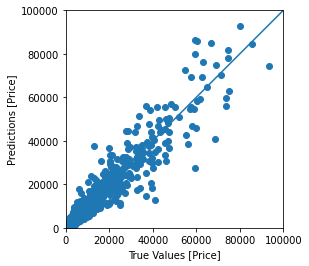

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
lims = [0, 100000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [ ]:
import time

t = time.time()

export_path_sm = "./{}".format(int(t))
print(export_path_sm)

tf.saved_model.save(model, export_path_sm)

./1597599048
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./1597599048/assets


In [ ]:
!ls {export_path_sm}

assets	saved_model.pb	variables


In [ ]:
import tensorflow_hub as hub

reload_saved_model = tf.keras.models.load_model(
  export_path_sm,
  custom_objects={'KerasLayer': hub.KerasLayer})

reload_saved_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               4096      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8

In [ ]:
DEFAULT_FUNCTION_KEY = "serving_default"
loaded = tf.saved_model.load(export_path_sm)
inference_func = loaded.signatures[DEFAULT_FUNCTION_KEY]

In [ ]:
loaded

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7f6c88727e80>

In [ ]:
inference_func

<ConcreteFunction signature_wrapper(dense_input) at 0x7F6C9A0DEDA0>

In [ ]:
# example_result = inference_func(example_batch)

example_tf_batch = tf.convert_to_tensor(example_batch, dtype='float32')

example_result = inference_func(example_tf_batch)
# for batch in example_batch.take(1):
#   print(inference_func(batch))

example_result

{'dense_8': <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2049.32]], dtype=float32)>}

In [ ]:
result_ = example_result['dense_8']
print(result_)
result_

tf.Tensor([[2049.32]], shape=(1, 1), dtype=float32)


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2049.32]], dtype=float32)>

In [ ]:
result_.numpy()

array([[2049.32]], dtype=float32)

In [ ]:
reload_saved_model.predict(example_batch)

array([[2049.32]], dtype=float32)

Let's take a look at the error distribution.


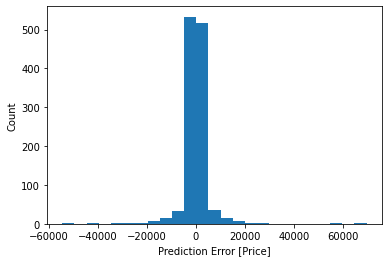

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Price]")
_ = plt.ylabel("Count")